In [1]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv('/content/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

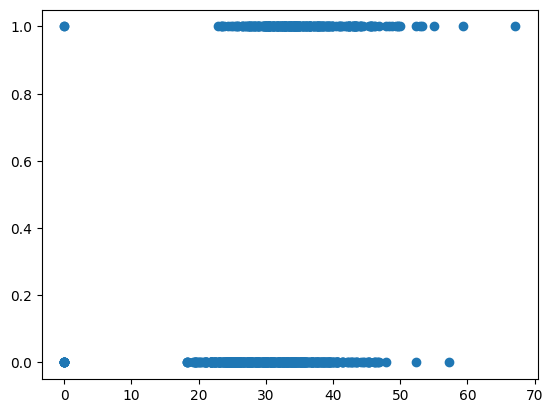

In [4]:
#plot x and y
import matplotlib.pyplot as plt
plt.scatter(X.BMI,y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X1

array([[ 0.63994726, -0.69289057,  0.20401277,  1.4259954 ,  0.84832379,
         0.46849198],
       [-0.84488505, -0.69289057, -0.68442195, -0.19067191, -1.12339636,
        -0.36506078],
       [ 1.23388019, -0.69289057, -1.10325546, -0.10558415,  1.94372388,
         0.60439732],
       ...,
       [ 0.3429808 ,  0.27959377, -0.73518964, -0.27575966,  0.00330087,
        -0.68519336],
       [-0.84488505, -0.69289057, -0.24020459,  1.17073215,  0.1597866 ,
        -0.37110101],
       [-0.84488505, -0.69289057, -0.20212881, -0.87137393, -0.8730192 ,
        -0.47378505]])

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)

In [7]:
# import the classifier
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)

LogisticRegression()

In [8]:
y_pred=logreg.predict(X1_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.7916666666666666
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.73      0.56      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



In [10]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 27,  35]])

Text(0.5, 427.9555555555555, 'Predicted label')

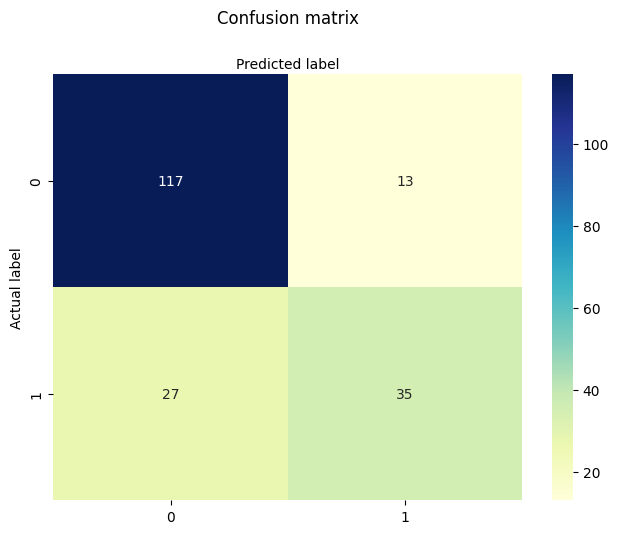

In [11]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7916666666666666
Precision: 0.7291666666666666
Recall: 0.5645161290322581


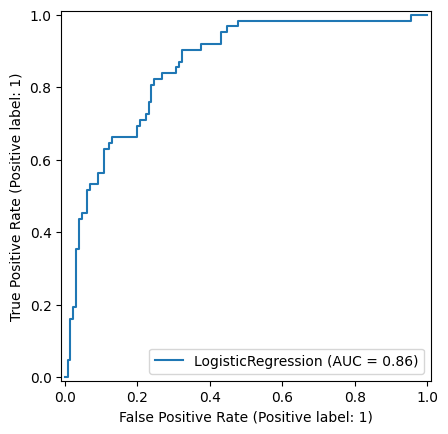

In [12]:
from sklearn.metrics import RocCurveDisplay
logreg = RocCurveDisplay.from_estimator(logreg, X1_test, y_test)